# Creating Fair Voting Districts Clustering

## Import Statements

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
import geopandas as gpd
import pandas as pd
import fiona 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

## Open Shapefile with Fiona and GeoPandas

In [12]:
 fiona.open('CO_census_block_2017.shp')

<open Collection 'CO_census_block_2017.shp:CO_census_block_2017', mode 'r' at 0x179adfe4400>

In [24]:
colorado = gpd.read_file('CO_census_block_2017.shp')

## Open CSV wtih Lat/Long for Possible Voting Locations

In [33]:
pol_locs = pd.read_csv('Polling-place-test-sheet.csv')

# creating a geometry column 
geometry = [Point(xy) for xy in zip(pol_locs['Longitude'], pol_locs['Latitude'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(pol_locs, crs=crs, geometry=geometry)

## Plot of Colorado Census Blocks with coloring based on Population

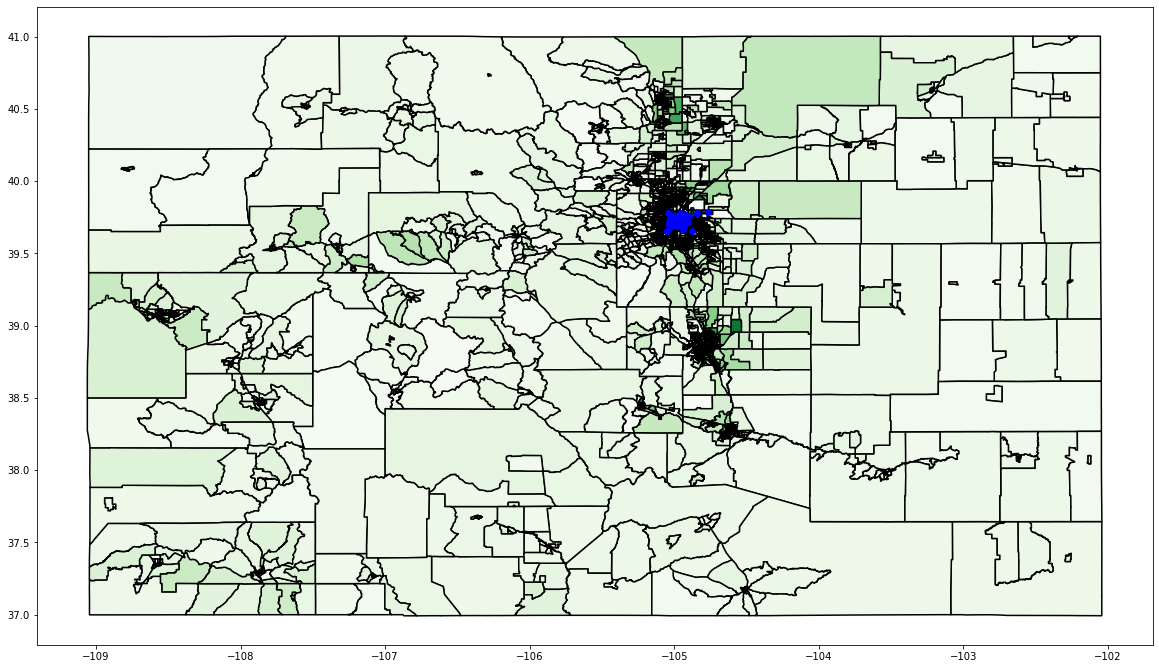

In [65]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'pop'
# set the range for the choropleth
vmin, vmax = colorado['pop'].min(), colorado['pop'].max()
# create figure and axes for Matplotlib
# fig, ax = plt.subplots(1, figsize=(20, 12))
ax = colorado.plot(column=variable, cmap='Greens', linewidth=1.5, edgecolor='black', figsize=(20, 12))

x, y = pol_locs['Longitude'].values, pol_locs['Latitude'].values
ax.scatter(x,y, marker="o", color='b')
# gdf.plot(marker='o')

plt.show()
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)



## Center of Each Census Block

In [48]:
from shapely.wkt import loads as load_wkt
centers = colorado['geometry'].centroid
print(centers)

0       POINT (-104.94472 39.58824)
1       POINT (-102.54838 37.28980)
2       POINT (-104.75700 39.77557)
3       POINT (-104.78380 38.82182)
4       POINT (-104.93424 39.70763)
                   ...             
3527    POINT (-105.09813 38.88131)
3528    POINT (-104.70305 39.93651)
3529    POINT (-104.89404 39.77591)
3530    POINT (-105.11884 39.73689)
3531    POINT (-105.09186 40.57500)
Length: 3532, dtype: geometry


## Create Matrix of Distnaces Between Census Blocks and Voting Locations

In [71]:
for i in range(0,colorado['pop'].size()):
    for j in range(0,gdf.size()):
        gdf[j,:].geometry.distance(centers[i,:])


TypeError: 'int' object is not callable